In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ruido_branco = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/M3/Filtro_Adaptativo/ruido_branco.pcm', mode='r', dtype=np.int16)

In [5]:
N = 20 # Tamanho
u = 0.00000000001 # Passo da adaptação
erro = 0

vetor_entrada = np.zeros(N)
planta = np.zeros(N)
w = np.zeros(N)
valores_erro = []

d = 0
y = 0

for j in range(0, N):
  planta[j] = 1/N

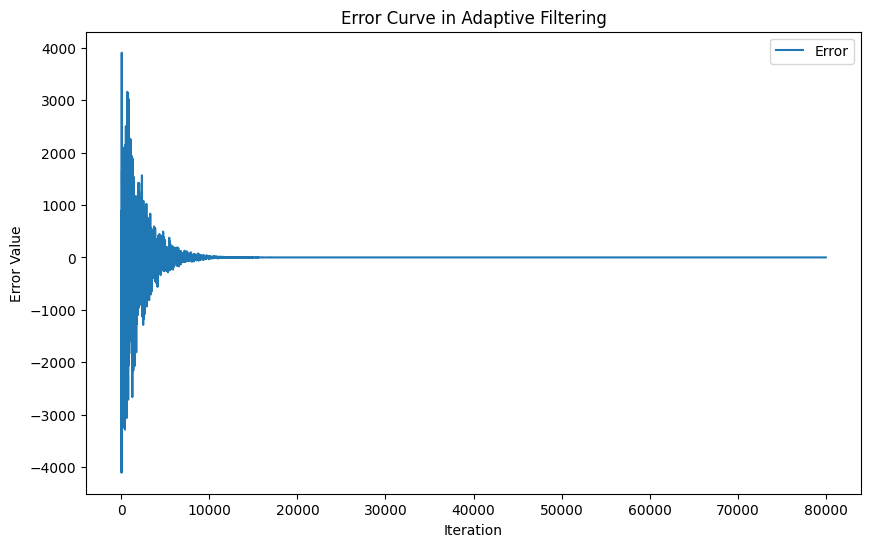

In [6]:
for j in range(0, np.size(ruido_branco)):

  vetor_entrada[0] = ruido_branco[j]

  d = 0
  y = 0
  erro = 0

  #Planta
  for i in range(0, N):
    d = vetor_entrada[i] * planta[i] + d

  #w0, w1, w2, w3
  for i in range(0, N):
    y = vetor_entrada[i] * w[i] + y

  erro = d - y

  for i in range(0, N):
    w[i] = w[i] + u * erro * vetor_entrada[i]

  valores_erro.append(erro.copy())
  #print(erro)

  for n in range(N-1, -1, -1):
    vetor_entrada[n] = vetor_entrada[n-1]


# Plot the error curve
plt.figure(figsize=(10, 6))
plt.plot(range(np.size(ruido_branco)), valores_erro, label='Error')
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.title('Error Curve in Adaptive Filtering')
plt.legend()
plt.show()


In [7]:
print(w)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


<StemContainer object of 3 artists>

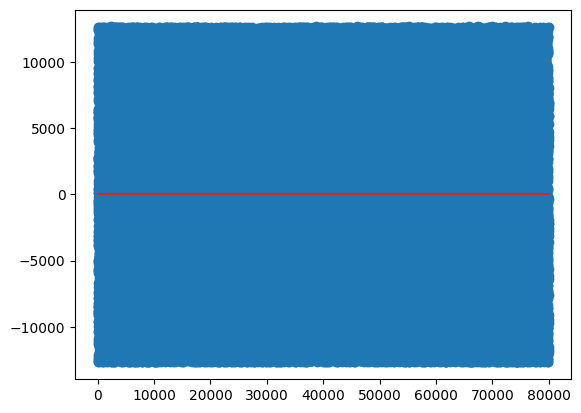

In [ ]:
plt.stem(ruido_branco)